In [150]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200

import seaborn as sns
import matplotlib.pyplot as plt


from clickhouse_driver import Client

client = Client('localhost', database="thesisattackimpactdb")

In [151]:
%%time 

exp_data_sql = """
SELECT
	ex.*
FROM
	experiment ex
"""
exp_df = client.query_dataframe(exp_data_sql)

exp_df["attacker_rate"] = exp_df["attacker_rate"].str.replace("mbps", "").astype(int)
exp_df["attacker_rate_mbps"] = exp_df["attacker_rate"]

print(len(exp_df.exp_id.unique().tolist()))
print("\n".join(exp_df.exp_id.unique().tolist()))
print()
exp_df

20
thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_100mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_10mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_10mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_1mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_1mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_2mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_2mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client
thesis_group_attack_rate_impact_3mbps_8clients_withattacker_coa

,exp_id,attacker_rate,server_connections,max_keep_alive_requests,num_clients,num_trials,origin_server_duration,attacker_duration,receiver_duration,proxy_duration,...,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker,attacker_rate_mbps
0,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,100,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,False,True,True,100
1,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,100,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,True,True,True,100
2,thesis_group_attack_rate_impact_10mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,10,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,False,True,True,10
3,thesis_group_attack_rate_impact_10mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,10,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,True,True,True,10
4,thesis_group_attack_rate_impact_1mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,False,True,True,1
5,thesis_group_attack_rate_impact_1mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,1,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,True,True,True,1
6,thesis_group_attack_rate_impact_2mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,False,True,True,2
7,thesis_group_attack_rate_impact_2mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,2,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,True,True,True,2
8,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,3,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,False,True,True,3
9,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,256,0,8,5,140,30,140,140,...,50,5,2,5,1,True,True,True,True,3


In [152]:
%%time 

fetch_metadata_sql = """
SELECT
	n.node_name,
	dn.dnid,
	dn.node_id,
  dn.exp_id
FROM 
	deployed_node dn
	JOIN node n ON n.node_id = dn.node_id
"""

metadata_df = client.query_dataframe(fetch_metadata_sql)

dnid_map_node_name = dict()
dnid_map_exp_id = dict()
node_id_map_node_name = dict()

for record in metadata_df.to_dict(orient="records"):
  dnid = record["dnid"]
  node_id = record["node_id"]
  node_name = record["node_name"]
  exp_id = record["exp_id"]
  
  assert dnid not in dnid_map_node_name
  dnid_map_node_name[dnid] = node_name
  dnid_map_exp_id[dnid] = exp_id
  
  if node_id in node_id_map_node_name:
    assert node_id_map_node_name[node_id] == node_name
  else:
    node_id_map_node_name[node_id] = node_name
  
client_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("client"))
attacker_dnids = set(dnid for dnid, node_name in dnid_map_node_name.items() if node_name.startswith("attacker"))

client_node_ids = set(node_id for node_id, node_name in node_id_map_node_name.items() if node_name.startswith("client"))

print(f"{client_dnids=}")
print(f"{attacker_dnids=}")
print(f"{client_node_ids=}")

client_dnids={2, 3, 4, 5, 6, 7, 8, 9, 14, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39, 40, 41, 42, 43, 44, 45, 50, 51, 52, 53, 54, 55, 56, 57, 62, 63, 64, 65, 66, 67, 68, 69, 74, 75, 76, 77, 78, 79, 80, 81, 86, 87, 88, 89, 90, 91, 92, 93, 98, 99, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113, 114, 115, 116, 117, 122, 123, 124, 125, 126, 127, 128, 129, 134, 135, 136, 137, 138, 139, 140, 141, 146, 147, 148, 149, 150, 151, 152, 153, 158, 159, 160, 161, 162, 163, 164, 165, 170, 171, 172, 173, 174, 175, 176, 177, 182, 183, 184, 185, 186, 187, 188, 189, 194, 195, 196, 197, 198, 199, 200, 201, 206, 207, 208, 209, 210, 211, 212, 213, 218, 219, 220, 221, 222, 223, 224, 225, 230, 231, 232, 233, 234, 235, 236, 237}
attacker_dnids={1, 133, 13, 145, 25, 157, 37, 169, 49, 181, 61, 193, 73, 205, 85, 217, 97, 229, 109, 121}
client_node_ids={2, 3, 4, 5, 6, 7, 8, 9}
CPU times: user 15.9 ms, sys: 3.81 ms, total: 19.8 ms
Wall time: 40.5 ms


In [153]:
%%time

client_messages_sql = f"""
WITH client_sends AS (
  SELECT
    dn.exp_id AS exp_id,
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_retransmitted AS coap_retransmitted
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
    JOIN deployed_node dn ON dn.dnid = e.observer_id
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.src_id IN ({','.join(map(str, client_node_ids))}) -- clients are senders (node ID)
), 

client_recvs AS (
  SELECT
    e.observe_timestamp AS observe_timestamp,
    e.trial AS trial,
    e.observer_id AS observer_id,
    e.message_marker AS message_marker,
    cm.coap_code AS response_code
  FROM
    event e
    JOIN message m ON m.message_id = e.message_id
    JOIN coap_message cm ON cm.cmci = m.coap_message
  WHERE
    e.observer_id IN ({','.join(map(str, client_dnids))})   -- client dnids
    AND m.dst_id IN ({','.join(map(str, client_node_ids))}) -- clients are receivers (node ID)
)

SELECT
  client_sends.exp_id AS exp_id,
  client_sends.trial AS trial,
  client_sends.observer_id AS observer_id,
  client_sends.message_marker AS message_marker,
  groupArray(client_recvs.response_code)[1] AS response_code,
  MIN(client_sends.observe_timestamp) AS send_time_sec,
  MIN(client_recvs.observe_timestamp) AS recv_time_sec,
  MIN(client_sends.observe_timestamp) AS first_send_time_sec,
  MAX(client_sends.observe_timestamp) AS last_send_time_sec,
  MIN(client_recvs.observe_timestamp) AS first_recv_time_sec,
  MAX(client_recvs.observe_timestamp) AS last_recv_time_sec,
  1e3 * (MIN(client_recvs.observe_timestamp) - MIN(client_sends.observe_timestamp)) AS rtt_ms_first_transmission,
  1e3 * (MIN(client_recvs.observe_timestamp) - MAX(client_sends.observe_timestamp)) AS rtt_ms_last_transmission,
  COUNT(client_sends.observe_timestamp) AS num_send_observations,
  COUNT(client_recvs.observe_timestamp) AS num_recv_observations,
  SUM(CASE WHEN client_sends.coap_retransmitted = true THEN 1 ELSE 0 END) AS num_retransmissions
FROM client_sends
  LEFT JOIN client_recvs USING (trial, observer_id, message_marker)
GROUP BY 
  exp_id, trial, observer_id, message_marker
ORDER BY
  exp_id, trial, observer_id, message_marker
"""

message_rtt_df = client.query_dataframe(client_messages_sql)
message_rtt_df.observer_id.replace(dnid_map_node_name, inplace=True)

message_rtt_df["successful_message"] = False
message_rtt_df.loc[(message_rtt_df["response_code"] == "content"), "successful_message"] = True

print(message_rtt_df["response_code"].unique())

message_rtt_df = message_rtt_df.merge(exp_df, on="exp_id", how="left")

# Due to left join, we need to eliminate lines that
# have negative RTT, so we NaN them.
message_rtt_df.loc[
  (message_rtt_df["rtt_ms_first_transmission"] < 0)
  | (message_rtt_df["rtt_ms_last_transmission"] < 0)
  ,
  ["rtt_ms_first_transmission", "rtt_ms_last_transmission"]
] = np.nan

message_rtt_df

['content' 'bad_gateway' '' 'gateway_timeout']
CPU times: user 7.17 s, sys: 1.97 s, total: 9.14 s
Wall time: 14.3 s


,exp_id,trial,observer_id,message_marker,response_code,send_time_sec,recv_time_sec,first_send_time_sec,last_send_time_sec,first_recv_time_sec,...,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker,attacker_rate_mbps
0,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,1,content,0.000000,0.348999,0.000000,0.000000,0.348999,...,50,5,2,5,1,True,False,True,True,100
1,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,2,content,0.364401,0.424893,0.364401,0.364401,0.424893,...,50,5,2,5,1,True,False,True,True,100
2,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,3,content,0.426992,0.487365,0.426992,0.426992,0.487365,...,50,5,2,5,1,True,False,True,True,100
3,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,4,content,0.489618,0.547904,0.489618,0.489618,0.547904,...,50,5,2,5,1,True,False,True,True,100
4,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,5,content,0.550316,0.607015,0.550316,0.550316,0.607015,...,50,5,2,5,1,True,False,True,True,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388713,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17773,content,125.717236,125.769829,125.717236,125.717236,125.769829,...,50,5,2,5,1,True,True,True,False,0
1388714,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17774,content,125.770620,125.823153,125.770620,125.770620,125.823153,...,50,5,2,5,1,True,True,True,False,0
1388715,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17775,content,125.823910,125.876400,125.823910,125.823910,125.876400,...,50,5,2,5,1,True,True,True,False,0
1388716,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client8,17776,content,125.877252,125.929843,125.877252,125.877252,125.929843,...,50,5,2,5,1,True,True,True,False,0


In [154]:
%%time

metric_usage_sql = f"""
SELECT
	dn.exp_id,
	nm.trial,
	nm.observer_id,
	nm.metric_type,
	AVG(nm.metric_value) AS avg_value,
	MIN(nm.metric_value) AS min_value,
	MAX(nm.metric_value) AS max_value
FROM
	node_metric nm
	JOIN deployed_node dn ON dn.dnid = nm.observer_id
GROUP BY
	dn.exp_id, nm.trial, nm.observer_id, nm.metric_type
ORDER BY
	dn.exp_id, nm.trial, nm.metric_type, nm.observer_id
"""

metric_df = client.query_dataframe(metric_usage_sql)

metric_df.observer_id.replace(dnid_map_node_name, inplace=True)

metric_df = metric_df.merge(exp_df, on="exp_id", how="left")

metric_df

CPU times: user 31.5 ms, sys: 0 ns, total: 31.5 ms
Wall time: 114 ms


,exp_id,trial,observer_id,metric_type,avg_value,min_value,max_value,attacker_rate,server_connections,max_keep_alive_requests,...,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker,attacker_rate_mbps
0,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,originserver,cpu_utilization,4.782857,0.5,22.4,100,256,0,...,50,5,2,5,1,True,False,True,True,100
1,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,cpu_utilization,15.685000,0.4,86.6,100,256,0,...,50,5,2,5,1,True,False,True,True,100
2,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,originserver,memory_utilization,291.244628,268.0,308.0,100,256,0,...,50,5,2,5,1,True,False,True,True,100
3,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,memory_utilization,3499.525000,256.0,5746.0,100,256,0,...,50,5,2,5,1,True,False,True,True,100
4,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,originserver,cpu_utilization,4.847857,0.4,21.4,100,256,0,...,50,5,2,5,1,True,False,True,True,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,4,proxy,memory_utilization,462.127273,245.0,495.0,0,256,0,...,50,5,2,5,1,True,True,True,False,0
396,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,originserver,cpu_utilization,1.485714,0.4,9.2,0,256,0,...,50,5,2,5,1,True,True,True,False,0
397,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,proxy,cpu_utilization,3.462143,0.5,26.5,0,256,0,...,50,5,2,5,1,True,True,True,False,0
398,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,originserver,memory_utilization,260.966997,247.0,262.0,0,256,0,...,50,5,2,5,1,True,True,True,False,0


In [156]:
%%time

client_rps_df = (
  message_rtt_df
  .groupby(by=["exp_id", "trial", "observer_id"])
  .aggregate(
    num_messages=("successful_message", "count"),
    num_successful_messages=("successful_message", "sum"),
    mean_rps=("successful_message", "sum"),
    max_num_retransmissions=("num_retransmissions", "max"),
    total_num_retransmissions=("num_retransmissions", "sum"),
    stddev_rtt_ms=("rtt_ms_first_transmission", "std"),
    min_rtt_ms=("rtt_ms_first_transmission", "min"),
    median_rtt_ms=("rtt_ms_first_transmission", "median"),
    mean_rtt_ms=("rtt_ms_first_transmission", "mean"),
    max_rtt_ms=("rtt_ms_first_transmission", "max"),
    rtt_ms_p0=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.00)),
    rtt_ms_p25=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.25)),
    rtt_ms_p50=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.50)),
    rtt_ms_p75=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.75)),
    rtt_ms_p90=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.90)),
    rtt_ms_p99=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=0.99)),
    rtt_ms_p100=("rtt_ms_first_transmission", lambda s : pd.Series.quantile(s, q=1.00)),
    first_active_time=("first_send_time_sec", "min"),
    last_active_time=("last_recv_time_sec", "max"),
  )
  .reset_index()
)
# assert client_rps_df["min_rtt_ms"].eq(client_rps_df["rtt_ms_p0"]).all()
# assert client_rps_df["median_rtt_ms"].eq(client_rps_df["rtt_ms_p50"]).all()
# assert client_rps_df["max_rtt_ms"].eq(client_rps_df["rtt_ms_p100"]).all()

client_rps_df["num_failed_messages"] = client_rps_df["num_messages"] - client_rps_df["num_successful_messages"]
client_rps_df["average_rps"] = client_rps_df["num_successful_messages"] / (client_rps_df["last_active_time"] - client_rps_df["first_active_time"])

client_rps_df = client_rps_df.merge(exp_df, on="exp_id")
bool_col_replacement = {
  "run_proxy_with_dtls": {True: "dtls", False: "coap"},
  "run_proxy_with_https": {True: "https", False: "http"},
  "reuse_connections": {True: "reuse-connections", False: "no-connection-reuse"},
  "run_attacker": {True: "attacker", False: "no-attacker"},
}
client_rps_df.replace(bool_col_replacement, inplace=True)

client_rps_df["mean_rps"] /= client_rps_df["client_duration"]

client_rps_df[["exp_id", "trial", "observer_id", "mean_rps"]]

client_rps_df

CPU times: user 5.63 s, sys: 18.6 ms, total: 5.65 s
Wall time: 5.65 s


,exp_id,trial,observer_id,num_messages,num_successful_messages,mean_rps,max_num_retransmissions,total_num_retransmissions,stddev_rtt_ms,min_rtt_ms,...,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker,attacker_rate_mbps
0,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client1,1568,1563,13.025000,2,8,357.855134,51.851988,...,50,5,2,5,1,reuse-connections,coap,https,attacker,100
1,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client2,1577,1570,13.083333,1,7,320.695932,51.739931,...,50,5,2,5,1,reuse-connections,coap,https,attacker,100
2,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client3,1578,1573,13.108333,1,6,359.381135,51.803112,...,50,5,2,5,1,reuse-connections,coap,https,attacker,100
3,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client4,1577,1573,13.108333,2,7,383.431770,51.846027,...,50,5,2,5,1,reuse-connections,coap,https,attacker,100
4,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,client5,1580,1573,13.108333,1,7,320.290151,51.772118,...,50,5,2,5,1,reuse-connections,coap,https,attacker,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client4,2211,2210,18.416667,0,0,1.313610,51.450014,...,50,5,2,5,1,reuse-connections,dtls,https,no-attacker,0
762,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client5,2219,2218,18.483333,0,0,0.544515,51.644802,...,50,5,2,5,1,reuse-connections,dtls,https,no-attacker,0
763,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client6,2219,2218,18.483333,0,0,0.817425,51.687956,...,50,5,2,5,1,reuse-connections,dtls,https,no-attacker,0
764,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client7,2220,2220,18.500000,0,0,0.749001,51.648855,...,50,5,2,5,1,reuse-connections,dtls,https,no-attacker,0


In [157]:
%%time

communication_pattern_rates_sql = f"""
WITH all_patterns AS (
  SELECT
    dn.exp_id AS exp_id,
    e.trial AS trial,
    e.observe_timestamp AS observe_timestamp,
    floor(e.observe_timestamp) AS timestamp_bin,
    e.message_marker AS message_marker,
    concat(node_src.node_name, '->', node_dst.node_name) AS communication_pattern,
    m.size_bytes AS size_bytes
  FROM
    event e
    JOIN deployed_node dn ON dn.dnid = e.observer_id
    JOIN message m ON m.message_id = e.message_id
    JOIN node node_src ON node_src.node_id = m.src_id
    JOIN node node_dst ON node_dst.node_id = m.dst_id

), pattern_aggregations AS (
  SELECT
    exp_id,
    trial,
    communication_pattern,
    timestamp_bin,
    SUM(size_bytes) AS sum_bytes,
    COUNT(DISTINCT message_marker) AS num_messages
  FROM
    all_patterns
  GROUP BY
    exp_id, trial, communication_pattern, timestamp_bin
)

SELECT
  *,
  (1e-6 * sum_bytes) AS megabytes_per_second,
  (8 * 1e-6 * sum_bytes) AS megabits_per_second
FROM
  pattern_aggregations
ORDER BY
  timestamp_bin
"""

binned_messages_df = client.query_dataframe(communication_pattern_rates_sql)

binned_messages_df = binned_messages_df.merge(exp_df, on="exp_id", how="left")

binned_messages_df

CPU times: user 658 ms, sys: 60.7 ms, total: 718 ms
Wall time: 34 s


,exp_id,trial,communication_pattern,timestamp_bin,sum_bytes,num_messages,megabytes_per_second,megabits_per_second,attacker_rate,server_connections,...,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker,attacker_rate_mbps
0,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy->client1,0.0,2212,7,0.002212,0.017696,3,256,...,50,5,2,5,1,True,False,True,True,3
1,thesis_group_num_clients_coap_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,client1->proxy,0.0,4385,13,0.004385,0.035080,0,256,...,50,5,2,5,1,True,False,True,False,0
2,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,3,proxy->client1,0.0,4065,12,0.004065,0.032520,3,256,...,50,5,2,5,1,True,False,True,True,3
3,thesis_group_attack_rate_impact_1mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,4,client1->proxy,0.0,5768,14,0.005768,0.046144,1,256,...,50,5,2,5,1,True,True,True,True,1
4,thesis_group_attack_rate_impact_4mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,proxy->originserver,0.0,3223,14,0.003223,0.025784,4,256,...,50,5,2,5,1,True,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192411,thesis_group_attack_rate_impact_7mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,4,proxy->client4,132.0,158,1,0.000158,0.001264,7,256,...,50,5,2,5,1,True,False,True,True,7
192412,thesis_group_attack_rate_impact_7mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,proxy->attacker,138.0,1210,11,0.001210,0.009680,7,256,...,50,5,2,5,1,True,False,True,True,7
192413,thesis_group_attack_rate_impact_7mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,proxy->attacker,145.0,110,1,0.000110,0.000880,7,256,...,50,5,2,5,1,True,False,True,True,7
192414,thesis_group_attack_rate_impact_7mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,proxy->attacker,146.0,180,3,0.000180,0.001440,7,256,...,50,5,2,5,1,True,False,True,True,7


In [158]:
### Prepare for dev graphing.

import matplotlib as mpl
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(mpl.rcParamsDefault)

In [159]:
# %%time

# # Example:
# # thesis_group_attack_rate_impact_10mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client
# # Becomes:
# # 10mbps_CoAPS

# filtered_binned_messages_df = binned_messages_df.copy()
# filtered_binned_messages_df["exp_id"] = filtered_binned_messages_df["exp_id"].str.replace("thesis_group_attack_rate_impact_", "")
# filtered_binned_messages_df["exp_id"] = filtered_binned_messages_df["exp_id"].str.replace("8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client", "CoAPS")
# filtered_binned_messages_df["exp_id"] = filtered_binned_messages_df["exp_id"].str.replace("8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client", "CoAP")

filtered_binned_messages_df = binned_messages_df[
  (binned_messages_df["communication_pattern"].str.contains("attacker->proxy"))
]

filtered_binned_messages_df

,exp_id,trial,communication_pattern,timestamp_bin,sum_bytes,num_messages,megabytes_per_second,megabits_per_second,attacker_rate,server_connections,...,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker,attacker_rate_mbps
41829,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,attacker->proxy,27.0,583708,2010,0.583708,4.669664,3,256,...,50,5,2,5,1,True,True,True,True,3
43435,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,attacker->proxy,28.0,750002,2590,0.750002,6.000016,3,256,...,50,5,2,5,1,True,True,True,True,3
44681,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,attacker->proxy,29.0,668826,2568,0.668826,5.350608,3,256,...,50,5,2,5,1,True,True,True,True,3
46006,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,attacker->proxy,30.0,604732,2840,0.604732,4.837856,3,256,...,50,5,2,5,1,True,True,True,True,3
48068,thesis_group_attack_rate_impact_3mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,3,attacker->proxy,31.0,749856,2590,0.749856,5.998848,3,256,...,50,5,2,5,1,True,True,True,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101348,thesis_group_attack_rate_impact_50mbps_8clients_withattacker_dtls_https__140sec_proxy__30sec_attacker__120sec_client,4,attacker->proxy,67.0,979222,3432,0.979222,7.833776,50,256,...,50,5,2,5,1,True,True,True,True,50
101365,thesis_group_attack_rate_impact_1mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,3,attacker->proxy,67.0,216648,1011,0.216648,1.733184,1,256,...,50,5,2,5,1,True,False,True,True,1
101440,thesis_group_attack_rate_impact_7mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,5,attacker->proxy,68.0,26676,247,0.026676,0.213408,7,256,...,50,5,2,5,1,True,False,True,True,7
101949,thesis_group_attack_rate_impact_7mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,3,attacker->proxy,68.0,2376,22,0.002376,0.019008,7,256,...,50,5,2,5,1,True,False,True,True,7


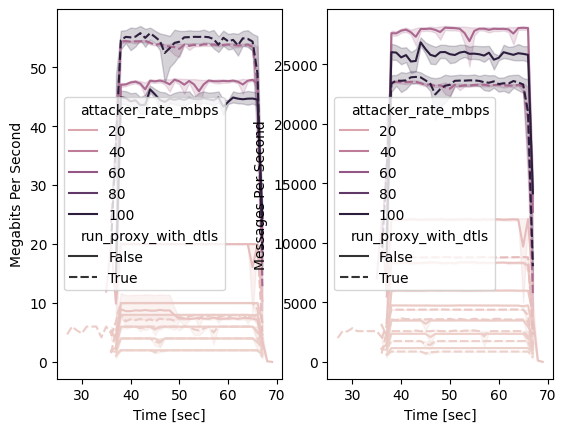

CPU times: user 33.2 s, sys: 161 ms, total: 33.3 s
Wall time: 33 s


In [160]:
%%time

fig, ax = plt.subplots(1, 2)
g1 = sns.lineplot(
  data=filtered_binned_messages_df,
  x="timestamp_bin",
  y="megabits_per_second",
  hue="attacker_rate_mbps",
  style="run_proxy_with_dtls",
  ax=ax[0],
)
ax[0].set_ylabel("Megabits Per Second")
ax[0].set_xlabel("Time [sec]")

g2 = sns.lineplot(
  data=filtered_binned_messages_df,
  x="timestamp_bin",
  y="num_messages",
  hue="attacker_rate_mbps",
  style="run_proxy_with_dtls",
  ax=ax[1],
)
ax[1].set_ylabel("Messages Per Second")
ax[1].set_xlabel("Time [sec]")

plt.show()

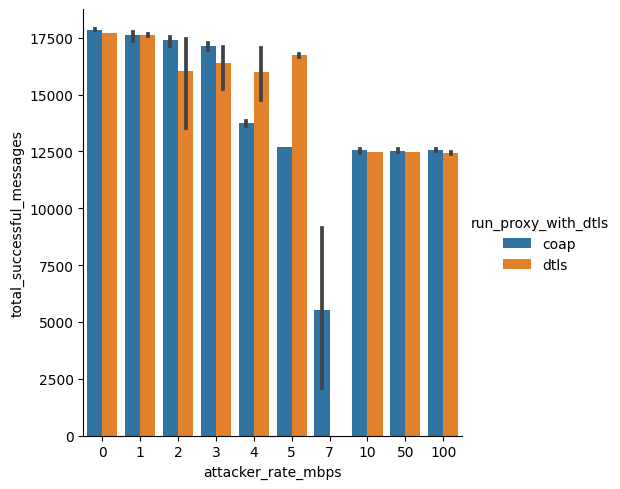

,exp_id,run_proxy_with_dtls,attacker_rate_mbps,trial,total_successful_messages
0,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,coap,100,1,12472
1,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,coap,100,2,12559
2,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,coap,100,3,12600
3,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,coap,100,4,12560
4,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,coap,100,5,12575
...,...,...,...,...,...
92,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,dtls,0,1,17706
93,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,dtls,0,2,17691
94,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,dtls,0,3,17682
95,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,dtls,0,4,17715


In [161]:
df = (
  client_rps_df
  .groupby(by=["exp_id", "run_proxy_with_dtls", "attacker_rate_mbps", "trial"])
  .agg(
    total_successful_messages=("num_successful_messages", "sum")
  )
  .reset_index()
)

g = sns.catplot(
  data=df,
  x="attacker_rate_mbps",
  y="total_successful_messages",
  hue="run_proxy_with_dtls",
  kind="bar",
)

plt.show()

df

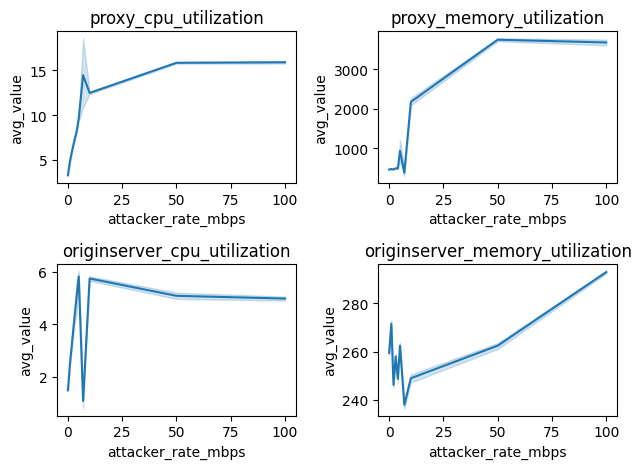

,exp_id,trial,observer_id,metric_type,avg_value,min_value,max_value,attacker_rate,server_connections,max_keep_alive_requests,...,num_proxy_connections,request_timeout,max_retries,keep_alive_duration,request_retry_interval,reuse_connections,run_proxy_with_dtls,run_proxy_with_https,run_attacker,attacker_rate_mbps
0,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,originserver,cpu_utilization,4.782857,0.5,22.4,100,256,0,...,50,5,2,5,1,True,False,True,True,100
1,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,cpu_utilization,15.685000,0.4,86.6,100,256,0,...,50,5,2,5,1,True,False,True,True,100
2,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,originserver,memory_utilization,291.244628,268.0,308.0,100,256,0,...,50,5,2,5,1,True,False,True,True,100
3,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,1,proxy,memory_utilization,3499.525000,256.0,5746.0,100,256,0,...,50,5,2,5,1,True,False,True,True,100
4,thesis_group_attack_rate_impact_100mbps_8clients_withattacker_coap_https__140sec_proxy__30sec_attacker__120sec_client,2,originserver,cpu_utilization,4.847857,0.4,21.4,100,256,0,...,50,5,2,5,1,True,False,True,True,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,4,proxy,memory_utilization,462.127273,245.0,495.0,0,256,0,...,50,5,2,5,1,True,True,True,False,0
396,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,originserver,cpu_utilization,1.485714,0.4,9.2,0,256,0,...,50,5,2,5,1,True,True,True,False,0
397,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,proxy,cpu_utilization,3.462143,0.5,26.5,0,256,0,...,50,5,2,5,1,True,True,True,False,0
398,thesis_group_num_clients_dtls_https_8clients_noattacker__140sec_proxy__30sec_attacker__120sec_client,5,originserver,memory_utilization,260.966997,247.0,262.0,0,256,0,...,50,5,2,5,1,True,True,True,False,0


In [162]:
df = metric_df

nodes = ["proxy", "originserver"]
metric_types = ["cpu_utilization", "memory_utilization"]
fig, ax = plt.subplots(len(metric_types), len(nodes))
for i, n in enumerate(nodes):
  for j, m in enumerate(metric_types):
    g = sns.lineplot(
      data=df[
        (df["observer_id"] == n)
        & (df["metric_type"] == m)
      ],
      x="attacker_rate_mbps",
      y="avg_value",
      ax=ax[i,j],
    )
    ax[i,j].set_title(f"{n}_{m}")

fig.tight_layout()
plt.show()

df

In [163]:
### At this point, we generate figures for the paper

plt.rcParams['figure.dpi']  = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size']        = '18'
plt.rcParams['lines.linewidth']  = 3
plt.rcParams['lines.markersize'] = 9

client_rps_df.replace({
  "run_proxy_with_dtls": {
    "coap": "CoAP",
    "dtls": "CoAPS",
  }
}, inplace=True)

In [164]:
# ### Plot effect of RTT as a result of increasing number of clients

# df = client_rps_df

# def get_properties(y):
#   if y == "mean_rtt_ms":
#     title = "Meant Client RTT in Milliseconds"
#     ylabel = title + " Milliseconds"
#   elif y == "rtt_ms_p99":
#     title = "99th Percentile Client RTT in Milliseconds"
#     ylabel = title + " in Milliseconds"
#   else:
#     raise Exception()
  
#   return {
#     "ylabel": ylabel,
#     "title": title,
#   }

# ys = ["mean_rtt_ms", "rtt_ms_p99"]
# fig, ax = plt.subplots(1, len(ys))
# for i, y in enumerate(ys):
#   g = sns.lineplot(
#     data=df,
#     x="num_clients",
#     y=y,
#     style="run_proxy_with_dtls",
#     ax=ax[i]
#   )

#   sns.move_legend(
#     g, 
#     "upper right", 
#     title="Client Protocol", 
#     frameon=True, 
#     labelspacing=0.05,
#     bbox_to_anchor=((1, 1)),
#     markerfirst=True,
#   )

#   props = get_properties(y)
#   ax[i].set_xlabel("Number of Clients")
#   ax[i].set_ylabel(props["ylabel"])
#   ax[i].set_title(props["title"])

# fig.tight_layout(pad=1)
# plt.show()